/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


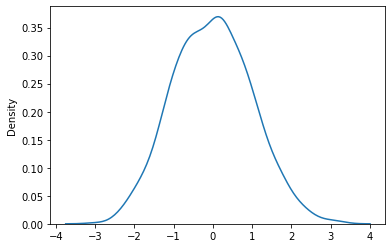

In [ ]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_array = random.normal(size=1000)
sns.distplot(random_array, hist=False);

In [ ]:
series = pd.Series(random_array)

Перед вами нормально-распределенный массив сконвертированный в Pandas Series. Необходимо расчитать следующие статистики для массива (series), используя только собственно-написанные формулы:
* среднее значение 
* медиану 
* стандартное отклонение
* межквартильный размах
* 23-й перцентиль


In [ ]:
series

0     -0.646064
1      0.296125
2     -0.959922
3      0.893985
4     -0.751342
         ...   
995    1.323540
996    0.131820
997    1.320444
998   -0.672603
999   -0.731417
Length: 1000, dtype: float64

# Cреднее значение

In [ ]:
# directly
a = series.mean()
a

-0.010352786551123663

In [ ]:
# manualy
b = series.sum()/series.size
b

-0.010352786551123663

In [ ]:
a == b

True

# Медиана

In [ ]:
# directly
a = series.median()
a

-0.010221728512954383

In [ ]:
def my_median(data):
    num = data.shape[0]
    id = num // 2
    sort_data = data.sort_values()
    # если нечетное количество
    if num % 2:
      return sort_data[id]
    # в противном случае берем среднее между соседними id - 1 и id
    else:
      return sort_data[id - 1:id + 1].sum()/ 2

# manualy
b = my_median(series)
b

-0.010221728512954383

In [ ]:
a == b

True

# Cтандартное отклонение

Масштабируйте, стандартизируйте или нормализуйте с помощью Scikit-Learn
https://machinelearningmastery.ru/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02/

In [ ]:
# directly
a = series.std()
a

1.004895142670544

В пандас стандартное отклонение по умолчанию идет по формуле чстичной выборки с `n-1` в знаментателе
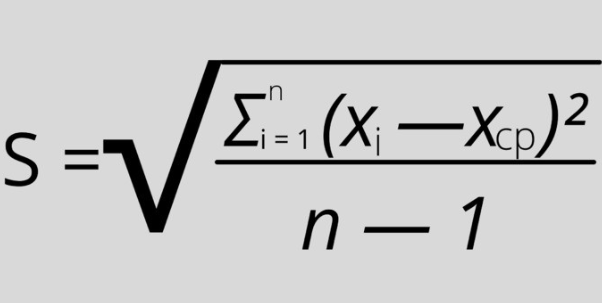

если выставить ddof = 0, то и в формуле ниже нужно убрать 1 из знаменателя или учесть в функции варианты применения.

In [ ]:
def my_std(data):
    meean_data = data.sum()/data.size
    num = series.size
    dispersion = ((data - meean_data)**2).sum()/(num-1)
    return dispersion**0.5

# manualy
b = my_std(series)
b

1.004895142670544

In [ ]:
a == b

True

# Mежквартильный размах

Квартиль – это то значение, которые делит ранжированные (отсортированные) данные на части, кратные одной четверти, или 25%. Так, 1-й квартиль – это значение, ниже которого находится 25% совокупности. 2-й квартиль делит совокупность данных пополам (то бишь медиана), ну и 3-й квартиль отделяет 25% наибольших значений.

Так вот **межквартильный размах** – это разница между 3-м и 1-м квартилями. У данного показателя есть одно неоспоримое преимущество: он является робастным, т.е. не зависит от аномальных отклонений.

In [ ]:
def my_percentile(data, percentile: float, interpolation='midpoint'):
    type_interpolation = ['midpoint', 'linear', 'nearest', 'uniform']
    size = len(data)
    sort_data = sorted(data)
    # округление до ближайшего большего числа.
    id_cut = int(size * percentile - size * percentile%1)
    interval = sort_data[id_cut] - sort_data[id_cut-1]
    if interpolation == type_interpolation[0]: k = 0.5
    elif interpolation == type_interpolation[1]:k = 1-percentile #((size-1) * percentile) % 1
    elif interpolation == type_interpolation[2]: k = 1 - round(percentile)
    elif interpolation == type_interpolation[3]: k = percentile
    else: 
      raise ValueError(f'Можно выбрать только из типов {type_interpolation}')
    print(k)
    return sorted(data)[id_cut-1] + interval*k


##  interpolation='midpoint'

In [ ]:
# directly
a = series.quantile(0.75, interpolation='midpoint') - series.quantile(0.25, interpolation='midpoint')
a

1.4176043474020519

In [ ]:
# manualy
b = my_percentile(series, 0.75, interpolation='midpoint') - my_percentile(series, 0.25, interpolation='midpoint')
b

0.5
0.5


1.4176043474020519

In [ ]:
a == b

True

In [ ]:
print(f'Разница ответов методов {round(100*abs((a-b)/a),2)} процента')

Разница ответов методов 0.0 процента


##  interpolation='nearest'

In [ ]:
series.quantile(0.75, interpolation='nearest')

0.683498987216229

In [ ]:
series.quantile(0.75, interpolation='lower')

0.683498987216229

In [ ]:
series.quantile(0.25, interpolation='nearest')

-0.7314172616173102

In [ ]:
series.quantile(0.25, interpolation='higher')

-0.7314172616173102

In [ ]:
# directly
a = series.quantile(0.75, interpolation='nearest') - series.quantile(0.25, interpolation='nearest')
a

1.4149162488335394

In [ ]:
# manualy
b = my_percentile(series, 0.75, interpolation='nearest') - my_percentile(series, 0.25, interpolation='nearest')
b

0
1


1.4149162488335394

In [ ]:
print(f'Разница ответов методов {round(100*abs((a-b)/a),2)} процента')

Разница ответов методов 0.0 процента


##  interpolation='linear'

In [ ]:
# directly
a = series.quantile(0.75, interpolation='linear') - series.quantile(0.25, interpolation='linear')
a

1.4162602981177956

In [ ]:
# manualy
b = my_percentile(series, 0.75, interpolation='linear') - my_percentile(series, 0.25, interpolation='linear')
b

1.4162602981177956

In [ ]:
print(f'Разница ответов методов {round(100*abs((a-b)/a),2)} процента')

Разница ответов методов 0.0 процента


# 23-й перцентиль

##  interpolation='midpoint'

In [ ]:
# directly
a = series.quantile(0.23, interpolation='midpoint')
a

-0.7794288086685156

In [ ]:
# manualy
b = my_percentile(series, 0.23, interpolation='midpoint')
b

-0.7794288086685156

In [ ]:
print(f'Разница ответов методов {round(100*abs((a-b)/a),2)} процента')

Разница ответов методов 0.0 процента


##  interpolation='nearest'

In [ ]:
# directly
a = series.quantile(0.23, interpolation='nearest')
a

-0.7786990710031455

In [ ]:
# manualy
b = my_percentile(series, 0.23, interpolation='nearest')
b

-0.7801585463338857

In [ ]:
print(f'Разница ответов методов {round(100*abs((a-b)/a),2)} процента')

Разница ответов методов 0.19 процента


##  interpolation='linear'

In [ ]:
# directly
a = series.quantile(0.23, interpolation='linear')
a

-0.7790347503292158

In [ ]:
# manualy
b = my_percentile(series, 0.23, interpolation='linear')
b

-0.7790347503292158

In [ ]:
print(f'Разница ответов методов {round(100*abs((a-b)/a),2)} процента')

Разница ответов методов 0.0 процента


In [ ]:
import math

def old_my_percentile(data, rate: float, interpolation='midpoint'):
    type_interpolation = ['midpoint', 'linear', 'nearest', ]
    size = len(data)
    sort_data = sorted(data)
    # округление до ближайшего большего числа.
    id_cut = int(math.ceil(size * rate))
    interval = sort_data[id_cut] - sort_data[id_cut -1]
    if interpolation == type_interpolation[0]: k = 0.5
    elif interpolation == type_interpolation[1]: k = (size - 1 * rate) % 1
    elif interpolation == type_interpolation[2]: k = round(rate)
    elif interpolation == type_interpolation[1]: k = rate
    else: 
      raise ValueError(f'Можно выбрать только из типов {type_interpolation}')
    return sorted(data)[id_cut - 1] + interval*k

# manualy
b = my_percentile(series, 0.75, interpolation='midpoint') - my_percentile(series, 0.25, interpolation='midpoint')
b

1.3073233375218918

In [ ]:
# manualy
b = my_percentile_(series, 0.23, interpolation='linear')
b

0.77


-0.7289401920599283

In [ ]:
series.quantile(0.23, interpolation='linear')

-0.7289401920599283

In [ ]:
series.quantile(0.75, interpolation='nearest') - 

- Задача 1

Вычеслите квадратный корень из суммы всех элементов списка **lst** не превышающих 57 и больше 4

-  Задача 2


> Цель задачи: получить максимальное значение кубика (считается последний бросок)
Условие: бросается кубик, после чего вы решаете бросать ли его повторно (повторно бросить можно только один раз)

> Вопрос: получение каких значений кубика его, с точки зрения статистики, стоит бросить повторно, чтобы получить лучший результат?***

- Задача 3
***Цифровой корень натурального числа в заданной системе счисления*** -\
это значение, получаемое итеративным расчётом суммы цифр, где на первой итерации происходит расчёт суммы цифр натурального числа, а на каждой следующей — расчёт суммы цифр результата предыдущей итерации. Операция выполняется до тех пор, пока вычисленное значение не становится меньше заданной системы счисления, т.е. до тех пор, пока оно не равняется одной-единственной цифре.\
1234
1+2+3+4
10
1+0
1
\
Найдите цифровой корень числа **158749** в десятичной системе счисления\
\
***!!!РЕШЕНИЕ ПОСТАРАЙТЕСЬ РЕАЛИЗОВАТЬ ЧЕРЕЗ ЦИКЛЫ И УСЛОВНЫЕ ОПЕРАТОРЫ***

In [ ]:
a= str(158749)
list(a)

['1', '5', '8', '7', '4', '9']

In [ ]:
a = []
for s in str(158749):
  a.append()

In [ ]:
def fun(num):
  a =list(str(num))
  a = 
  a = sum(list)
  if a <= 9 :
    return a
  elif: 

- Задача 1

Вычеслите квадратный корень из суммы всех элементов списка **lst** не превышающих 57 и больше 4

In [ ]:
sps = np.random.randint(4,58, 10)
np.sqrt(sps.sum())

16.522711641858304

-  Задача 2


> Цель задачи: получить максимальное значение кубика (считается последний бросок)
Условие: бросается кубик, после чего вы решаете бросать ли его повторно (повторно бросить можно только один раз)

> Вопрос: получение каких значений кубика его, с точки зрения статистики, стоит бросить повторно, чтобы получить лучший результат?***

In [ ]:
1,2,3